# Семинар 2

## План ноутбука

1. Высокоуровневое API для обучение нейросетей в `PyTorch`
2. Обучение первой нейросети в `PyTorch`

## Высокоуровневое API для обучение нейросетей в `PyTorch`

In [114]:
import torch
import torch.nn as nn

### Создание объекта нейросети

In [115]:
"""
Linear((Relu(W x + b)))
in_features -> out_features
"""

net = nn.Sequential(
    nn.Linear(700, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

In [116]:
net

Sequential(
  (0): Linear(in_features=700, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=10, bias=True)
)

In [117]:
net[0]

Linear(in_features=700, out_features=500, bias=True)

In [118]:
x = torch.rand(5, 700)

x.shape

torch.Size([5, 700])

In [119]:
net(x)

tensor([[-0.0261,  0.0266, -0.1313, -0.0854, -0.0834,  0.0353, -0.0099,  0.0764,
         -0.0009,  0.1153],
        [-0.0417,  0.0361, -0.0810, -0.1014, -0.0855,  0.1230, -0.0436,  0.0474,
          0.0139,  0.1107],
        [-0.0130,  0.0527, -0.0725, -0.0879, -0.0473,  0.0745, -0.0521,  0.0053,
         -0.0197,  0.1077],
        [-0.0045,  0.0511, -0.0845, -0.0797, -0.0463,  0.0896, -0.0579,  0.0220,
         -0.0329,  0.1192],
        [ 0.0154,  0.0239, -0.1005, -0.1152, -0.0963,  0.0816, -0.0260,  0.0234,
         -0.0403,  0.0979]], grad_fn=<AddmmBackward0>)

In [120]:
net(x).shape

torch.Size([5, 10])

In [121]:
from collections import OrderedDict

net = nn.Sequential(
    OrderedDict(
        [
            ('linear1', nn.Linear(700, 500)),
            ('relu1', nn.ReLU()),
            ('linear2', nn.Linear(500, 200)),
            ('relu2', nn.ReLU()),
            ('linear3', nn.Linear(200, 10))
        ]
    )
)

In [122]:
net

Sequential(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=500, out_features=200, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)

In [123]:
net.linear1

Linear(in_features=700, out_features=500, bias=True)

In [124]:
net[0]

Linear(in_features=700, out_features=500, bias=True)

In [125]:
type(net[0])

torch.nn.modules.linear.Linear

In [126]:
type(net)

torch.nn.modules.container.Sequential

In [127]:
net.parameters()

<generator object Module.parameters at 0x7f5dfcf649e0>

In [128]:
n = next(iter(net.parameters()))
n

Parameter containing:
tensor([[-0.0202,  0.0144, -0.0006,  ...,  0.0345,  0.0148,  0.0326],
        [-0.0022,  0.0197,  0.0104,  ...,  0.0285,  0.0304,  0.0259],
        [-0.0028,  0.0092,  0.0376,  ..., -0.0090,  0.0052, -0.0127],
        ...,
        [-0.0219,  0.0362, -0.0151,  ..., -0.0173, -0.0258,  0.0212],
        [ 0.0306,  0.0328,  0.0150,  ..., -0.0179,  0.0173,  0.0331],
        [ 0.0350,  0.0076,  0.0123,  ..., -0.0270,  0.0031, -0.0295]],
       requires_grad=True)

In [129]:
list(net.parameters())

[Parameter containing:
 tensor([[-0.0202,  0.0144, -0.0006,  ...,  0.0345,  0.0148,  0.0326],
         [-0.0022,  0.0197,  0.0104,  ...,  0.0285,  0.0304,  0.0259],
         [-0.0028,  0.0092,  0.0376,  ..., -0.0090,  0.0052, -0.0127],
         ...,
         [-0.0219,  0.0362, -0.0151,  ..., -0.0173, -0.0258,  0.0212],
         [ 0.0306,  0.0328,  0.0150,  ..., -0.0179,  0.0173,  0.0331],
         [ 0.0350,  0.0076,  0.0123,  ..., -0.0270,  0.0031, -0.0295]],
        requires_grad=True),
 Parameter containing:
 tensor([-1.8423e-02,  3.2973e-02, -3.2495e-02,  1.7587e-04,  1.0663e-02,
          1.1083e-02, -1.6751e-02, -1.7430e-02,  1.0561e-03,  2.1072e-02,
         -1.0349e-02,  3.0658e-02, -2.1424e-02, -2.4202e-02,  3.5751e-02,
          2.9138e-02,  1.2555e-02, -2.4313e-02,  1.4204e-02,  3.5846e-03,
         -1.3096e-02, -3.5779e-02, -2.0417e-02,  2.9522e-02, -1.4885e-02,
          3.4256e-02, -2.8697e-02,  2.3847e-02,  3.3423e-02, -1.3431e-02,
          1.7176e-02,  3.0524e-02, -2.23

In [130]:
type(n)

torch.nn.parameter.Parameter

### Создание нейронки

In [131]:
input_tensor = torch.rand(6, 700)

net(input_tensor).shape

torch.Size([6, 10])

In [132]:
# необходимо отнаследоваться от nn.Module и определить методы __init__ и forward

class CustomTaskNetwork(nn.Module):
    def __init__(self, in_features=700, out_features=10, hidden_dim=500):
        super().__init__()

        self.linear1 = nn.Linear(in_features, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, out_features)

        self.activation1 = nn.ReLU()
        self.activation2 = nn.ReLU()

    def forward(self, x):
        output = self.activation1(self.linear1(x))
        output = self.activation2(self.linear2(output))
        output = self.linear3(output)

        return output

In [133]:
net = CustomTaskNetwork()

In [134]:
net(input_tensor)

tensor([[-0.0691,  0.0589, -0.0292,  0.0699, -0.0816, -0.0042,  0.0518, -0.1008,
          0.0529,  0.0456],
        [-0.0539,  0.0877, -0.0609,  0.0895, -0.1082,  0.0842, -0.0028, -0.0632,
          0.0578,  0.0134],
        [-0.0524,  0.0757, -0.0731,  0.0802, -0.0979, -0.0108,  0.0547, -0.0928,
          0.0669,  0.0775],
        [ 0.0105,  0.0237,  0.0056,  0.1173, -0.1279, -0.0095,  0.0245, -0.0685,
          0.0267,  0.0470],
        [-0.0265,  0.0345, -0.0617,  0.0772, -0.0819, -0.0193,  0.0349, -0.0997,
          0.0535,  0.1074],
        [-0.0623,  0.0719, -0.0440,  0.0997, -0.0987,  0.0324,  0.0081, -0.1099,
          0.0595,  0.0820]], grad_fn=<AddmmBackward0>)

In [135]:
net(input_tensor).shape

torch.Size([6, 10])

### Сохранение и восстановление состояния модельки (веса и не только)

In [136]:
torch.save(net.state_dict(), "model.pt")

In [137]:
net.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0268,  0.0254, -0.0354,  ...,  0.0262, -0.0046, -0.0154],
                      [-0.0369,  0.0340,  0.0029,  ..., -0.0084,  0.0206, -0.0167],
                      [-0.0341, -0.0264, -0.0280,  ...,  0.0120, -0.0339,  0.0033],
                      ...,
                      [ 0.0246,  0.0060, -0.0159,  ...,  0.0359,  0.0064,  0.0278],
                      [ 0.0322, -0.0185,  0.0004,  ...,  0.0297,  0.0341, -0.0327],
                      [ 0.0249, -0.0356,  0.0290,  ..., -0.0108,  0.0021,  0.0193]])),
             ('linear1.bias',
              tensor([-3.6171e-02, -3.4121e-02, -2.0904e-02, -1.8603e-02,  2.6656e-02,
                      -1.8344e-02,  3.6835e-02,  2.0426e-03, -2.2384e-02, -3.4321e-03,
                      -1.4558e-04, -2.5205e-02, -3.2127e-02,  2.1856e-02,  3.4096e-03,
                      -3.2718e-02,  1.3937e-02,  3.1027e-02, -2.5598e-03, -1.6508e-02,
                      -3.6715e-02,  3.3151e-02,  1.8101e

Восстановим состояние модельки через метод `torch.load`

In [138]:
weights = torch.load("model.pt")

net.load_state_dict(weights)


/tmp/ipykernel_28880/3043383149.py:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



<All keys matched successfully>

In [139]:
!ls -lah

total 7.2M
drwxr-xr-x 3 fvelikon dpt_ext_searchportal_dep45091_dep98468 4.0K Oct 18 10:13  .
drwxr-xr-x 4 fvelikon dpt_ext_searchportal_dep45091_dep98468 4.0K Oct 16 20:51  ..
drwxr-xr-x 3 fvelikon dpt_ext_searchportal_dep45091_dep98468 4.0K Oct 18 10:13  mnist_example
-rw-r--r-- 1 fvelikon dpt_ext_searchportal_dep45091_dep98468 2.4M Oct 18 11:00  model.pt
-rw-r--r-- 1 fvelikon dpt_ext_searchportal_dep45091_dep98468 1.2K Oct 18 10:54  optimizer_state.pt
-rw-r--r-- 1 fvelikon dpt_ext_searchportal_dep45091_dep98468 4.9M Oct 18 11:00 'Seminar_2_Intro_to_DL copy.ipynb'


In [140]:
cuda_device = torch.device("cuda:0")

In [141]:
net.to(cuda_device)

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation1): ReLU()
  (activation2): ReLU()
)

In [142]:
net.linear1.weight.device

device(type='cuda', index=0)

In [143]:
try:
    print(net(input_tensor).shape)
except RuntimeError as e:
    print(f"Caught Error: {e}")
    print(f"Moving input to the net's device")
    print(net(input_tensor.to(net.linear1.weight.device)).shape)

Caught Error: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)
Moving input to the net's device
torch.Size([6, 10])


перетаскивание модели между девайсами происходит in-place в отличие от тензоров:

In [144]:
net.cpu()
print(net.linear1.weight.device)
net.cuda()
print(net.linear1.weight.device)

cpu
cuda:0


In [145]:
input_tensor.device

device(type='cpu')

In [146]:
input_tensor.cuda()  # copied on GPU
print(input_tensor.device)
input_tensor.cpu()
print(input_tensor.device)

cpu
cpu


### Training and evaluation mode

In [147]:
net.train()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation1): ReLU()
  (activation2): ReLU()
)

In [148]:
net.training

True

In [149]:
net.eval()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation1): ReLU()
  (activation2): ReLU()
)

In [150]:
net.training

False

Если мы хотим проинициализировать сетку какими-то весами из словаря, то важно чтобы названия и размеры параметров в передаваемом словаре совпадали с названиями и размерами параметров сетки

In [151]:
net.load_state_dict({'linear5.weight': torch.rand((1, 2, 3))})

RuntimeError: Error(s) in loading state_dict for CustomTaskNetwork:
	Missing key(s) in state_dict: "linear1.weight", "linear1.bias", "linear2.weight", "linear2.bias", "linear3.weight", "linear3.bias". 
	Unexpected key(s) in state_dict: "linear5.weight". 

### Оптимизаторы

In [152]:
# Образно как работает оптимизитор
# for param in parameters:
#     param = param - param.grad * self.lr

In [153]:
from torch import optim

In [154]:
optim.SGD, optim.Adam

(torch.optim.sgd.SGD, torch.optim.adam.Adam)

In [155]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

Передача оптимизатору параметров происходит через передачу `net.parameters()`

In [156]:
optimizer = optim.Adam(net.parameters(), betas=(0.9, 0.999), lr=1e-3)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

У оптимизатора тоже есть состояние, и его тоже можно сохранять:

In [157]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.001,
   'betas': (0.9, 0.999),
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False,
   'maximize': False,
   'foreach': None,
   'capturable': False,
   'differentiable': False,
   'fused': None,
   'params': [0, 1, 2, 3, 4, 5]}]}

In [158]:
torch.save(optimizer.state_dict(), "optimizer_state.pt")
!ls -la

total 7368
drwxr-xr-x 3 fvelikon dpt_ext_searchportal_dep45091_dep98468    4096 Oct 18 10:13  .
drwxr-xr-x 4 fvelikon dpt_ext_searchportal_dep45091_dep98468    4096 Oct 16 20:51  ..
drwxr-xr-x 3 fvelikon dpt_ext_searchportal_dep45091_dep98468    4096 Oct 18 10:13  mnist_example
-rw-r--r-- 1 fvelikon dpt_ext_searchportal_dep45091_dep98468 2426484 Oct 18 11:00  model.pt
-rw-r--r-- 1 fvelikon dpt_ext_searchportal_dep45091_dep98468    1152 Oct 18 11:00  optimizer_state.pt
-rw-r--r-- 1 fvelikon dpt_ext_searchportal_dep45091_dep98468 5095454 Oct 18 11:00 'Seminar_2_Intro_to_DL copy.ipynb'


Можно устанавливать отдельные гиперпараметры оптимизатора для некоторых параметров модели

In [159]:
optimizer = optim.SGD(
    [
        {'params': net.linear1.parameters()},
        {'params': net.linear2.parameters(), 'lr': 1e-3}
    ],
    lr=1e-2,
    momentum=0.9
)

In [160]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

### Функции потерь

In [161]:
nn.L1Loss, nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss

(torch.nn.modules.loss.L1Loss,
 torch.nn.modules.loss.MSELoss,
 torch.nn.modules.loss.CrossEntropyLoss,
 torch.nn.modules.loss.NLLLoss)

In [162]:
loss = nn.MSELoss()

In [163]:
loss

MSELoss()

In [164]:
x = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

output = loss(x, target)

print(output)

output.backward()

tensor(2.0147, grad_fn=<MseLossBackward0>)


In [165]:
x.grad

tensor([[ 0.1491, -0.1176,  0.3031,  0.1326, -0.1366],
        [-0.1830, -0.1514, -0.1514, -0.0756,  0.0340],
        [ 0.2844,  0.3305,  0.0509, -0.3034,  0.0465]])

In [166]:
loss = nn.CrossEntropyLoss()

x = torch.randn(3, 5, requires_grad=True)
y = torch.empty(3, dtype=torch.long).random_(5)

x, y

(tensor([[-0.6186,  0.6759, -0.5934, -1.8913,  0.8443],
         [-0.7745, -0.0245, -0.4942, -0.5674, -0.7603],
         [-1.3790, -0.2490, -2.1049,  1.8216,  0.2409]], requires_grad=True),
 tensor([0, 3, 3]))

In [167]:
loss(x, y)

tensor(1.4511, grad_fn=<NllLossBackward0>)

### Датасеты и даталоадеры

In [168]:
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

In [169]:
n_features = 2
n_objects = 300

torch.manual_seed(0)

In [170]:
w_true = torch.randn(n_features, 1)

X = (torch.rand(n_objects, n_features) - 0.5) * 10
X *= (torch.arange(n_features) * 2 + 1)

Y = X @ w_true
Y += torch.rand_like(Y)

w_true.shape, X.shape, Y.shape

(torch.Size([2, 1]), torch.Size([300, 2]), torch.Size([300, 1]))

In [171]:
# !pip install -U plotly kaleido

In [172]:
import plotly.express as px

def draw_curve(values, title=""):
    fig = px.line(y=values, title=title)
    return fig.show()


In [173]:
px.scatter(x=X[:, 0], y=X[:, 1], color=Y.ravel())

In [174]:
w_true

tensor([[ 1.5410],
        [-0.2934]])

In [175]:
w = torch.rand_like(w_true)

w

tensor([[0.8515],
        [0.4355]])

Возьмем батч размера 10:

In [176]:
idx = torch.randint(low=0, high=len(X), size=(10,))

print(idx)

X[idx]

tensor([187, 129, 253, 265, 164,  94,  42, 234,  24,  46])


tensor([[ 3.5792, 11.5819],
        [ 2.6479, 11.5128],
        [-1.4386,  9.2739],
        [-3.7900, -0.0723],
        [ 4.9880,  9.5218],
        [-3.5269,  0.6690],
        [ 1.9228, -8.8846],
        [ 2.8751, -1.6891],
        [ 1.9844,  2.0264],
        [ 2.4966,  3.1395]])

In [177]:
X[idx] @ w - Y[idx]

tensor([[ 5.3130],
        [ 6.0207],
        [ 7.4817],
        [ 1.9516],
        [ 3.3851],
        [ 2.3044],
        [-8.0110],
        [-3.5445],
        [ 0.0646],
        [-0.2048]])

В торче есть удобный интерфейс датасета, который позволяет проводить индексацию и поддерживает трансформации элементов датасета:

In [178]:
dataset = TensorDataset(X, Y)

In [179]:
dataset[7]

(tensor([-3.3897, -6.5319]), tensor([-3.1964]))

In [180]:
X[7], Y[7]

(tensor([-3.3897, -6.5319]), tensor([-3.1964]))

Создадим свой датасет:

In [181]:
# надо отнаследоваться от Dataset и определить методы __init__, __len__ и __getitem__

class CustomDataset(Dataset):
    def __init__(self, w_true, n_features, n_objects):
        super().__init__()
        self.X = (torch.rand(n_objects, n_features) - 0.5) * 10
        self.X *= (torch.arange(n_features) * 2 + 1)

        self.Y = self.X @ w_true
        self.Y += torch.rand_like(self.Y)

    def __len__(self) -> int:
        return len(self.Y)

    def __getitem__(self, item) -> tuple[torch.Tensor, torch.Tensor]:
        return self.X[item], self.Y[item]

In [182]:
dataset = CustomDataset(w_true, n_features, n_objects)

In [183]:
dataset[1:4]

(tensor([[  2.2037,   2.0442],
         [  2.4385, -14.9808],
         [ -4.6143,   9.1984]]),
 tensor([[ 3.3043],
         [ 8.6212],
         [-9.5554]]))

In [184]:
dataset.X[1:4]

tensor([[  2.2037,   2.0442],
        [  2.4385, -14.9808],
        [ -4.6143,   9.1984]])

Dataloader - "надстройка" над датасетом, позволяет подгружать данные в модель в итеративном формате. Поддерживает поставку данных батчами

In [185]:
from torch.utils.data import DataLoader

In [186]:
loader = DataLoader(dataset, batch_size=16, shuffle=True, drop_last=True)

In [187]:
for x, y in loader:
    print(f"{x=}\t{x.shape=}")
    print(f"{y=}\t{y.shape=}")
    break

x=tensor([[ -2.9015,   6.6300],
        [ -0.3560,   6.6353],
        [ -1.2036,  -9.0953],
        [  2.4853, -12.8256],
        [ -0.1387, -10.0784],
        [  3.3867,   0.8197],
        [ -0.4416,  -9.9501],
        [  1.9599,  11.0638],
        [ -4.1539,   6.7369],
        [ -3.1893, -12.2039],
        [ -4.6143,   9.1984],
        [  4.0396, -14.6011],
        [ -1.8085,   9.7476],
        [  0.0179,  -2.8841],
        [  0.7301,   3.9014],
        [ -4.4686,   5.6486]])	x.shape=torch.Size([16, 2])
y=tensor([[-5.7080],
        [-1.7142],
        [ 1.4832],
        [ 8.4498],
        [ 3.6238],
        [ 5.6033],
        [ 2.8486],
        [ 0.0737],
        [-8.3245],
        [-0.6409],
        [-9.5554],
        [10.6888],
        [-5.2321],
        [ 0.9538],
        [ 0.4254],
        [-7.7641]])	y.shape=torch.Size([16, 1])


## Встроенные датасеты

In [188]:
# !pip install torchvision

In [189]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Lambda

dataset = MNIST("./mnist_example/", 
                transform=Compose(
                    [
                        ToTensor(),
                        Lambda(lambda x: torch.flatten(x))
                     ]
                ),
                download=True,
            )
valid_dataset = MNIST("./mnist_example/",
                      train=False,
                      transform=Compose(
                    [
                        ToTensor(),
                        Lambda(lambda x: torch.flatten(x))
                     ]
                ),
                download=True,)

In [190]:
dataset[0][0].shape

torch.Size([784])

# Напишем утилиты для обучения 

### Общая структура обучения модели
- модель
- оптимизатор
- датасет $\to$ даталоадер
- лосс-функция
- train loop

In [191]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CustomTaskNetwork(in_features=dataset[0][0].shape[0], out_features=10).to(device)
optimizer = torch.optim.Adam(model.parameters())
train_dataloader = DataLoader(dataset=dataset, batch_size=4096, shuffle=True)
valid_dataloader = DataLoader(dataset=valid_dataset, batch_size=4096, shuffle=False)

loss_fn = nn.CrossEntropyLoss().to(device)

model.train()

for x, y in train_dataloader:
    optimizer.zero_grad()

    output = model(x.to(device))

    loss = loss_fn(output, y.to(device))

    loss.backward()

    optimizer.step()

Засунем все в функцию, чтобы вызывать ее каждую эпоху

In [192]:
from tqdm import tqdm

In [193]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer


def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn: nn.Module, device: torch.device):
    model.train()

    total_loss = 0
    
    for i, (x, y) in tqdm(enumerate(data_loader), total=len(data_loader), desc="[TRAIN]"):
        optimizer.zero_grad()
        x = x.to(device)
        y = y.to(device)

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.detach()

        optimizer.step()

    return total_loss.item() / len(data_loader)


Создадим функцию для валидации:

In [194]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn: nn.Module, device: torch.device):
    model.eval()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader, desc="[VALIDATION]", total=len(data_loader))):
        output = model(x.to(device))

        loss = loss_fn(output, y.to(device))

        total_loss += loss.detach()

    return total_loss.item() / len(data_loader)


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='darkgrid')


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')

    plt.legend()

    plt.ylabel("Loss")
    plt.xlabel("Epochs")

    plt.show()

In [196]:
from IPython.display import clear_output


def fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, title, device):
    train_loss_history, valid_loss_history = [None], [None]

    # vvvvvv uncomment if you want to see untuned model performance
    # train_loss_history, valid_loss_history = [evaluate(model, train_loader, loss_fn, device)], [evaluate(model, valid_loader, loss_fn, device)]

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, loss_fn, device)
        valid_loss = evaluate(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

    clear_output()
    plot_stats(train_loss_history, valid_loss_history, title)

Наша первая функци полноценного обучения готова!

In [197]:
!nvidia-smi

Fri Oct 18 11:00:42 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti      On | 00000000:17:00.0 Off |                  N/A |
| 26%   34C    P2               59W / 260W|    315MiB / 11264MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

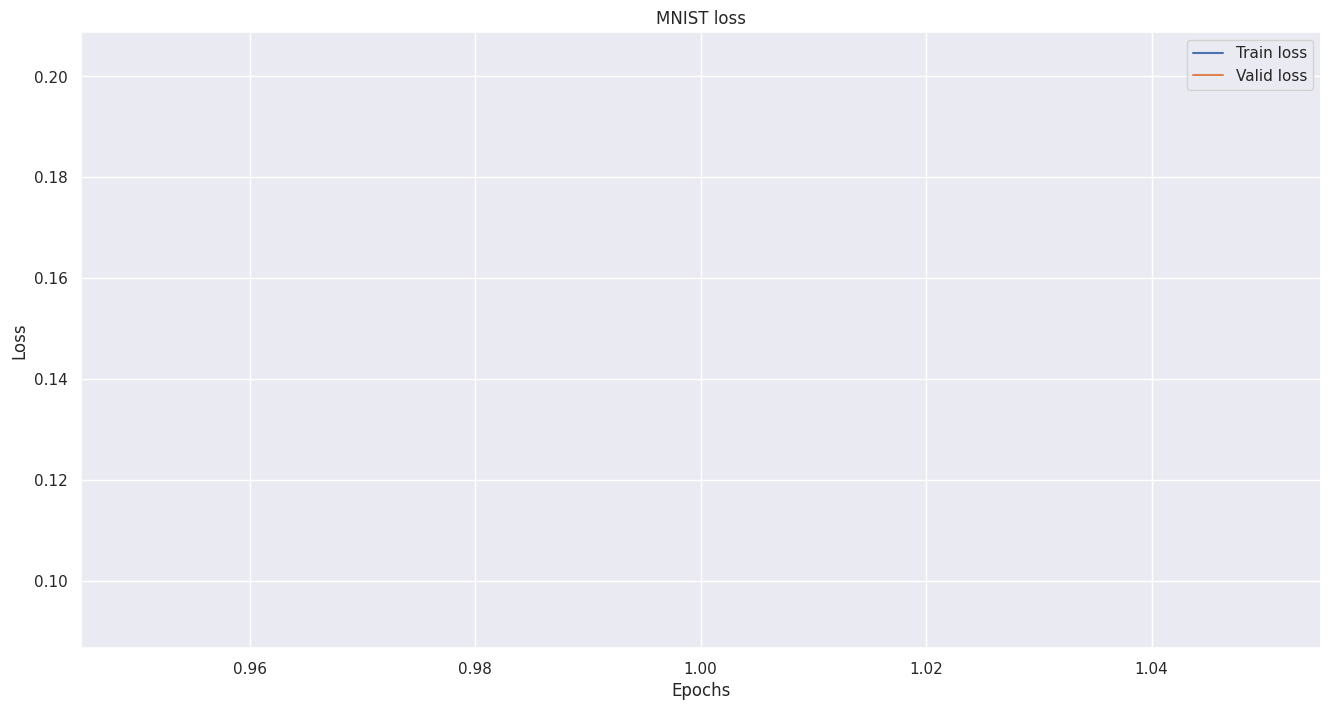

In [212]:
BATCH_SIZE = 2 ** 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CustomTaskNetwork(in_features=784, out_features=10).to(device)
optimizer = torch.optim.Adam(model.parameters())                                   
train_dataloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True,
                              num_workers=1,  # parallel dataloading
                              prefetch_factor=2, # number of batches each worker should preload

                              # for more info, see link: https://discuss.pytorch.org/t/when-does-a-pytorch-dataset-worker-pull-new-data/153286/2
                              )
valid_dataloader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

loss_fn = nn.CrossEntropyLoss().to(device)

model.train()


fit(model=model, train_loader=train_dataloader, valid_loader=valid_dataloader,
    optimizer=optimizer, loss_fn=loss_fn, num_epochs=1, title="MNIST", device=device)

## Обучение первой нейросети в `PyTorch`

In [88]:
class CustomTaskNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)


model = CustomTaskNetwork().to(device=device)

optimizer = optim.Adam(model.parameters(), lr=1e-2)

loss_fn = nn.MSELoss().to(device=device)

In [89]:
from torch.utils.data import random_split


dataset = TensorDataset(X, Y)

train_dataset, valid_dataset = random_split(
    dataset,
    (int(len(dataset) * 0.8), len(dataset) -  int(len(dataset) * 0.8)),
    generator=torch.Generator().manual_seed(300)
)

In [90]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

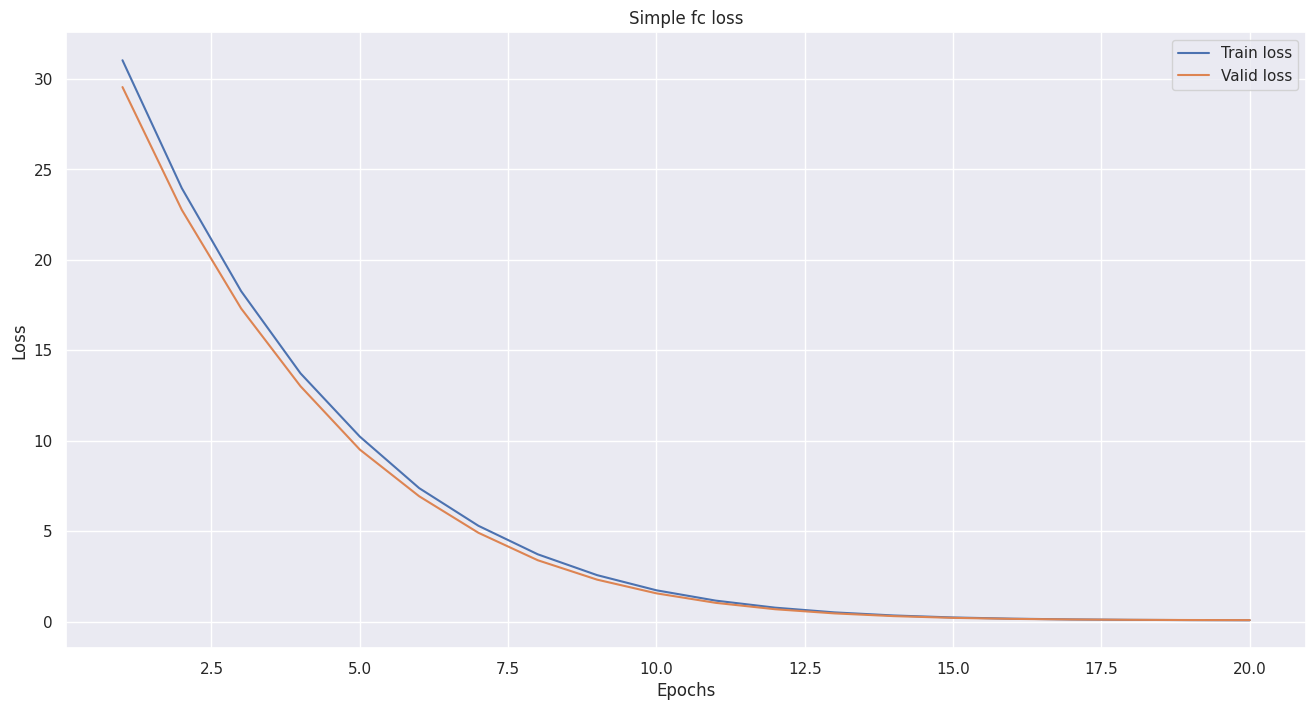

In [91]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, 20, 'Simple fc', device=device)

### Что будет, если не делать ни разу `zero_grad()`

Обсуждение на форуме - [link](https://discuss.pytorch.org/t/why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch/4903?u=alband)

In [92]:
def calculate_grad_norm(model_parameters):
    total_norm = 0
    parameters = [p for p in model_parameters if p.grad is not None and p.requires_grad]
    for p in parameters:
        param_norm = p.grad.detach().data.norm(2)
        total_norm += param_norm.item() ** 2
    total_norm = total_norm ** 0.5
    return total_norm

In [93]:
net = CustomTaskNetwork()
optimizer = optim.Adam(net.parameters(), lr=1e-1)
loss_fn = nn.MSELoss()
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

grad_history = []

net.train()
loss_progress = []

for i, (x, y) in enumerate(loader):
    
    optimizer.zero_grad()

    output = net(x)

    loss = loss_fn(output, y)

    loss.backward()

    optimizer.step()
    loss_progress.append(loss.item())
    grad_history.append(calculate_grad_norm(net.parameters()))

draw_curve(loss_progress, title="MSE")
draw_curve(grad_history, title="Grad norm")

## BatchNorm и Dropout

In [94]:
dropout = nn.Dropout(p=0.5)

dropout

Dropout(p=0.5, inplace=False)

In [95]:
x = torch.rand(3, 7)

x

tensor([[0.3166, 0.5887, 0.3350, 0.2137, 0.9619, 0.4246, 0.5764],
        [0.5919, 0.7981, 0.1666, 0.6384, 0.8641, 0.6368, 0.5130],
        [0.4272, 0.9998, 0.8821, 0.1310, 0.9730, 0.4096, 0.2838]])

In [96]:
x / (1 - 0.5)  # Dropout normalization

tensor([[0.6331, 1.1774, 0.6700, 0.4274, 1.9239, 0.8493, 1.1529],
        [1.1837, 1.5961, 0.3332, 1.2768, 1.7283, 1.2736, 1.0261],
        [0.8545, 1.9995, 1.7642, 0.2620, 1.9459, 0.8191, 0.5676]])

In [97]:
dropout.train()

for _ in range(3):
    print(dropout(x))

tensor([[0.6331, 0.0000, 0.6700, 0.4274, 0.0000, 0.8493, 0.0000],
        [0.0000, 0.0000, 0.3332, 0.0000, 0.0000, 0.0000, 1.0261],
        [0.0000, 1.9995, 0.0000, 0.2620, 1.9459, 0.8191, 0.0000]])
tensor([[0.6331, 0.0000, 0.0000, 0.0000, 1.9239, 0.8493, 0.0000],
        [1.1837, 1.5961, 0.3332, 1.2768, 0.0000, 1.2736, 0.0000],
        [0.8545, 0.0000, 1.7642, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 1.1774, 0.6700, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.1837, 1.5961, 0.3332, 1.2768, 0.0000, 0.0000, 1.0261],
        [0.0000, 1.9995, 1.7642, 0.0000, 1.9459, 0.8191, 0.0000]])


In [98]:
dropout.eval()

dropout(x)

tensor([[0.3166, 0.5887, 0.3350, 0.2137, 0.9619, 0.4246, 0.5764],
        [0.5919, 0.7981, 0.1666, 0.6384, 0.8641, 0.6368, 0.5130],
        [0.4272, 0.9998, 0.8821, 0.1310, 0.9730, 0.4096, 0.2838]])

In [99]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm

BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [100]:
x = torch.rand(3, 7)

x

tensor([[0.9783, 0.7975, 0.0562, 0.9591, 0.4312, 0.6371, 0.1739],
        [0.7696, 0.1801, 0.6294, 0.1519, 0.2364, 0.5494, 0.1734],
        [0.4974, 0.0737, 0.8181, 0.7287, 0.3091, 0.9748, 0.2102]])

In [101]:
batch_norm(x)

tensor([[ 1.1674,  1.4010, -1.3736,  1.0188,  1.3133, -0.4544, -0.6814],
        [ 0.1074, -0.5337,  0.3955, -1.3588, -1.1085, -0.9324, -0.7095],
        [-1.2747, -0.8673,  0.9781,  0.3400, -0.2048,  1.3868,  1.3909]],
       grad_fn=<NativeBatchNormBackward0>)

In [102]:
batch_norm.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

In [103]:
batch_norm.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [104]:
batch_norm.running_mean

tensor([0.0748, 0.0350, 0.0501, 0.0613, 0.0326, 0.0720, 0.0186])

In [105]:
batch_norm.running_var

tensor([0.9058, 0.9153, 0.9157, 0.9173, 0.9010, 0.9050, 0.9000])

In [106]:
batch_norm.num_batches_tracked

tensor(1)

In [107]:
batch_norm(x)

batch_norm.num_batches_tracked

tensor(2)

In [108]:
batch_norm.eval()

batch_norm(x)

tensor([[ 0.9227,  0.7980, -0.0426,  0.9178,  0.4099,  0.5525,  0.1540],
        [ 0.6924,  0.1240,  0.5828,  0.0386,  0.1937,  0.4557,  0.1534],
        [ 0.3920,  0.0078,  0.7888,  0.6668,  0.2744,  0.9256,  0.1943]],
       grad_fn=<NativeBatchNormBackward0>)

In [109]:
batch_norm.num_batches_tracked

tensor(2)

In [110]:
x

tensor([[0.9783, 0.7975, 0.0562, 0.9591, 0.4312, 0.6371, 0.1739],
        [0.7696, 0.1801, 0.6294, 0.1519, 0.2364, 0.5494, 0.1734],
        [0.4974, 0.0737, 0.8181, 0.7287, 0.3091, 0.9748, 0.2102]])

In [111]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm.eval()

batch_norm(x)

tensor([[0.9783, 0.7975, 0.0562, 0.9591, 0.4312, 0.6371, 0.1739],
        [0.7695, 0.1801, 0.6294, 0.1519, 0.2364, 0.5494, 0.1734],
        [0.4974, 0.0737, 0.8181, 0.7287, 0.3091, 0.9748, 0.2102]],
       grad_fn=<NativeBatchNormBackward0>)

# Бонус
Что делать, если хочется батч больше, но видеокарта не позволяет?


Есть несколько способов, самый простой - увеличить эффективный размер батча (делать аккумуляцию градиента каждые `k` шагов)

In [112]:
grad_accumulation_steps = k = 4

net = CustomTaskNetwork()
optimizer = optim.Adam(net.parameters(), lr=1e-1)
loss_fn = nn.MSELoss()
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

grad_history = []

net.train()
loss_progress = []


for step, (x, y) in enumerate(loader, 1):
    

    output = net(x)

    loss = loss_fn(output, y)
    loss.backward()
    grad_history.append(calculate_grad_norm(net.parameters()))

    if step % grad_accumulation_steps == 0:
        optimizer.step()
        optimizer.zero_grad()

    loss_progress.append(loss.item())

draw_curve(loss_progress, title="MSE")
draw_curve(grad_history, title="Grad norm")